# Sentiment Analysis of Hotel Reviews

This assignment focuses on performing sentiment analysis on hotel reviews using NLTK (Natural Language Toolkit) and HuggingFace's DistilBERT.

Dataset: https://www.kaggle.com/datasets/jiashenliu/515k-hotel-reviews-data-in-europe

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install transformers datasets torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# 1. Import Libraries

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from transformers import pipeline
from wordcloud import WordCloud

# 2. Load Dataset

In [4]:
file_path = '/Hotel Reviews_NLP/Hotel_Reviews.csv'
df = pd.read_csv(file_path)
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

In [6]:
df_orig = df.copy

#3. Quick Cleanup

In [7]:
# Working on a sample of the data (~10%) to make this run faster
df = df.head(51574)
print(df.shape)

(51574, 17)


In [8]:
# Filter out placeholder reviews if they are not informative
df['Positive_Review'] = df['Positive_Review'].replace('No Positive', None)
df['Negative_Review'] = df['Negative_Review'].replace('No Negative', None)

<ipython-input-8-13da2ea6c21e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Positive_Review'] = df['Positive_Review'].replace('No Positive', None)
<ipython-input-8-13da2ea6c21e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Negative_Review'] = df['Negative_Review'].replace('No Negative', None)


In [9]:
# Create separate DataFrames for positive and negative reviews
positive_df = df[['Hotel_Name','Positive_Review']].dropna().rename(columns={'Positive_Review': 'Review'})
positive_df['Sentiment'] = 'POSITIVE'

In [10]:
negative_df = df[['Hotel_Name','Negative_Review']].dropna().rename(columns={'Negative_Review': 'Review'})
negative_df['Sentiment'] = 'NEGATIVE'

In [11]:
# Concatenate the two DataFrames
combined_df = pd.concat([positive_df, negative_df], ignore_index=True)

# Mix the positive and negative reviews
combined_df = combined_df.sample(frac=1).reset_index(drop=True)

In [12]:
combined_df.head()

,Hotel_Name,Review,Sentiment
0,Park Grand London Lancaster Gate,Friendly staff and very attentive on our arri...,POSITIVE
1,Novotel London West,Showers were not powerful enough and the temp...,NEGATIVE
2,Intercontinental London The O2,My vertigo after looking out of my window,NEGATIVE
3,H tel de Jos phine BONAPARTE,Decorations location attentive staff adorable...,POSITIVE
4,Le Metropolitan a Tribute Portfolio Hotel,the location is essentially what makes this h...,NEGATIVE


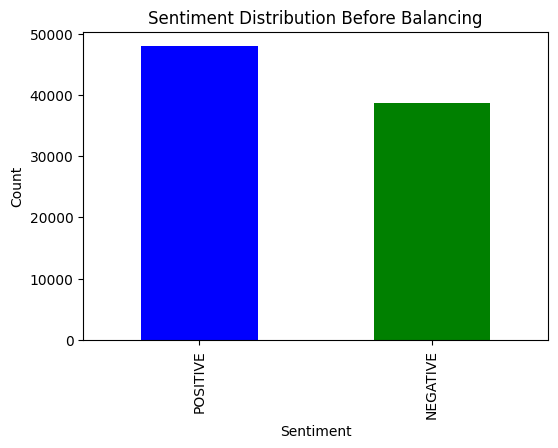

In [13]:
# Plot sentiment distribution before balancing
plt.figure(figsize=(6,4))
combined_df['Sentiment'].value_counts().plot(kind='bar', color=['blue', 'green'])
plt.title("Sentiment Distribution Before Balancing")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [14]:
# Undersample positive reviews to evenly distribute negative and positive reviews
positive_downsampled = positive_df.sample(n=len(negative_df), random_state=314)

In [15]:
# Combine back the balanced data
balanced_df = pd.concat([positive_downsampled, negative_df])

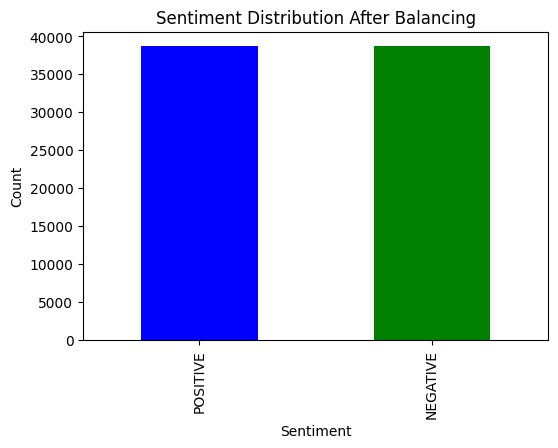

In [16]:
# Plot sentiment distribution after balancing
plt.figure(figsize=(6,4))
balanced_df['Sentiment'].value_counts().plot(kind='bar', color=['blue', 'green'])
plt.title("Sentiment Distribution After Balancing")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [17]:
print(balanced_df.shape)

(77380, 3)


# 4. NLKT

In [18]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [19]:
sia = SentimentIntensityAnalyzer()

# SentimentIntensityAnalyzer() positive example
pos_text = "This is a great hotel with excellent amenities."
pos_score = sia.polarity_scores(pos_text)
print(pos_score)

{'neg': 0.0, 'neu': 0.391, 'pos': 0.609, 'compound': 0.8316}


In [20]:
# SentimentIntensityAnalyzer() negative example
neg_text = "This is a terrible hotel with horrible amenities."
neg_score = sia.polarity_scores(neg_text)
print(neg_score)

{'neg': 0.569, 'neu': 0.431, 'pos': 0.0, 'compound': -0.765}


In [21]:
# Define a function to get compound sentiment score
def get_sentiment(text):
    return sia.polarity_scores(text)['compound']

In [22]:
# Apply the function to reviews
balanced_df['Sentiment_Score_NLTK'] = balanced_df['Review'].apply(get_sentiment)
balanced_df.head()

,Hotel_Name,Review,Sentiment,Sentiment_Score_NLTK
49451,H tel Duc De St Simon,Very helpful staff with boarding cards reserv...,POSITIVE,0.7841
48335,Park Grand London Lancaster Gate,Staff were so helpful Friendly and polite Hot...,POSITIVE,0.9577
3076,The Park Grand London Paddington,Comfy beds room was lovely,POSITIVE,0.5859
11512,Crowne Plaza London Kings Cross,Excellent location Staff were friendly No com...,POSITIVE,0.8519
8096,InterContinental London Park Lane,Polite and friendly staff,POSITIVE,0.4939


In [23]:
# Function to classify sentiment as POSITIVE or NEGATIVE based on score
def classify_sentiment_simple(score):
    if score > 0:
        return 'POSITIVE'
    else:
        return 'NEGATIVE'

In [24]:
# Apply the classification function to create prediction column
balanced_df['Predicted_Sentiment_NLKT'] = balanced_df['Sentiment_Score_NLTK'].apply(classify_sentiment_simple)
balanced_df.head()

,Hotel_Name,Review,Sentiment,Sentiment_Score_NLTK,Predicted_Sentiment_NLKT
49451,H tel Duc De St Simon,Very helpful staff with boarding cards reserv...,POSITIVE,0.7841,POSITIVE
48335,Park Grand London Lancaster Gate,Staff were so helpful Friendly and polite Hot...,POSITIVE,0.9577,POSITIVE
3076,The Park Grand London Paddington,Comfy beds room was lovely,POSITIVE,0.5859,POSITIVE
11512,Crowne Plaza London Kings Cross,Excellent location Staff were friendly No com...,POSITIVE,0.8519,POSITIVE
8096,InterContinental London Park Lane,Polite and friendly staff,POSITIVE,0.4939,POSITIVE


In [25]:
# Model Evaluation
accuracy = accuracy_score(balanced_df['Sentiment'], balanced_df['Predicted_Sentiment_NLKT'])
print(f'Accuracy: {accuracy:.4f}')
class_report = classification_report(balanced_df['Sentiment'], balanced_df['Predicted_Sentiment_NLKT'])
print("Classification Report:\n", class_report)
conf_matrix = confusion_matrix(balanced_df['Sentiment'], balanced_df['Predicted_Sentiment_NLKT'], normalize = 'true')

Accuracy: 0.7859
Classification Report:
               precision    recall  f1-score   support

    NEGATIVE       0.82      0.73      0.77     38690
    POSITIVE       0.76      0.84      0.80     38690

    accuracy                           0.79     77380
   macro avg       0.79      0.79      0.79     77380
weighted avg       0.79      0.79      0.79     77380



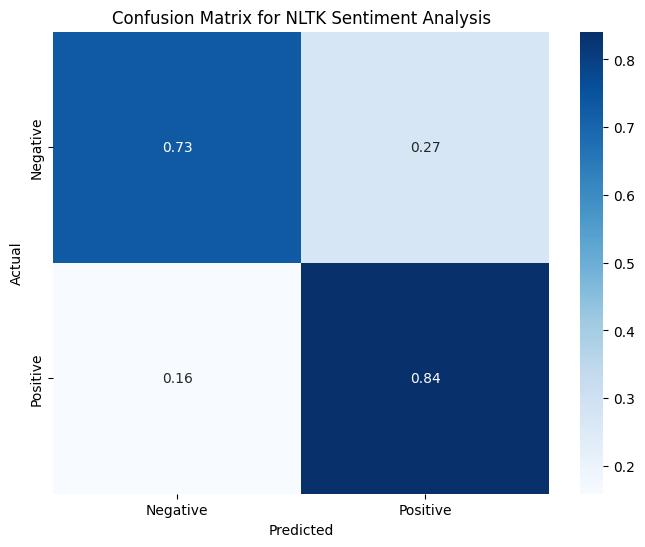

In [40]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for NLTK Sentiment Analysis')
plt.show()

#5. Pretrained Model DistilBERT

In [27]:
# Load sentiment analysis pipeline
classifier = pipeline('sentiment-analysis', model='distilbert-base-uncased-finetuned-sst-2-english')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0


In [28]:
def get_sentiment(text):
    result = classifier(text)
    return result[0]['label']  # This will return 'POSITIVE' or 'NEGATIVE'

# Add predicted review column
balanced_df['Predicted_Review_DistilBERT'] = balanced_df['Review'].apply(get_sentiment)

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


In [29]:
balanced_df.head()

,Hotel_Name,Review,Sentiment,Sentiment_Score_NLTK,Predicted_Sentiment_NLKT,Predicted_Review_DistilBERT
49451,H tel Duc De St Simon,Very helpful staff with boarding cards reserv...,POSITIVE,0.7841,POSITIVE,POSITIVE
48335,Park Grand London Lancaster Gate,Staff were so helpful Friendly and polite Hot...,POSITIVE,0.9577,POSITIVE,POSITIVE
3076,The Park Grand London Paddington,Comfy beds room was lovely,POSITIVE,0.5859,POSITIVE,POSITIVE
11512,Crowne Plaza London Kings Cross,Excellent location Staff were friendly No com...,POSITIVE,0.8519,POSITIVE,POSITIVE
8096,InterContinental London Park Lane,Polite and friendly staff,POSITIVE,0.4939,POSITIVE,POSITIVE


In [30]:
# Model Evaluation
accuracy2 = accuracy_score(balanced_df['Sentiment'], balanced_df['Predicted_Review_DistilBERT'])
print(f'Accuracy: {accuracy2:.4f}')
class_report2 = classification_report(balanced_df['Sentiment'], balanced_df['Predicted_Review_DistilBERT'])
print("Classification Report:\n", class_report2)
conf_matrix2 = confusion_matrix(balanced_df['Sentiment'], balanced_df['Predicted_Review_DistilBERT'], normalize = 'true')

Accuracy: 0.8848
Classification Report:
               precision    recall  f1-score   support

    NEGATIVE       0.93      0.84      0.88     38690
    POSITIVE       0.85      0.93      0.89     38690

    accuracy                           0.88     77380
   macro avg       0.89      0.88      0.88     77380
weighted avg       0.89      0.88      0.88     77380



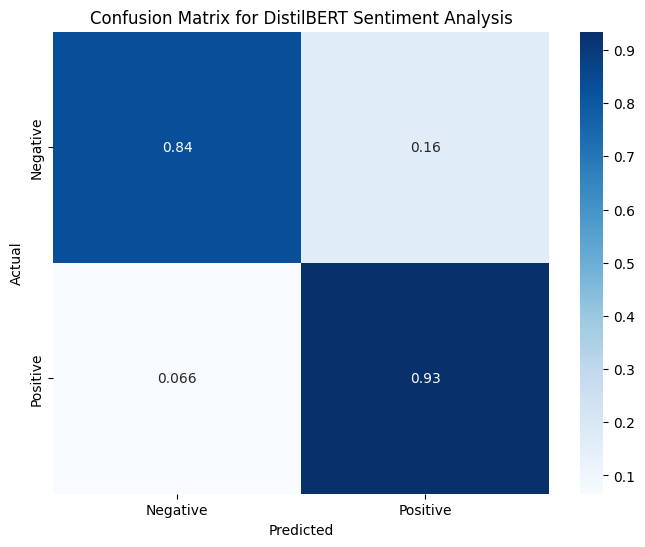

In [41]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, cmap='Blues',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for DistilBERT Sentiment Analysis')
plt.show()

## Both models work well, but DistilBERT is the best performer.

In [32]:
# Convert sentiment labels to numeric scores
balanced_df['Sentiment_Score_DistilBERT'] = balanced_df['Predicted_Review_DistilBERT'].apply(lambda x: 1 if x == 'POSITIVE' else -1)
balanced_df.head()

,Hotel_Name,Review,Sentiment,Sentiment_Score_NLTK,Predicted_Sentiment_NLKT,Predicted_Review_DistilBERT,Sentiment_Score_DistilBERT
49451,H tel Duc De St Simon,Very helpful staff with boarding cards reserv...,POSITIVE,0.7841,POSITIVE,POSITIVE,1
48335,Park Grand London Lancaster Gate,Staff were so helpful Friendly and polite Hot...,POSITIVE,0.9577,POSITIVE,POSITIVE,1
3076,The Park Grand London Paddington,Comfy beds room was lovely,POSITIVE,0.5859,POSITIVE,POSITIVE,1
11512,Crowne Plaza London Kings Cross,Excellent location Staff were friendly No com...,POSITIVE,0.8519,POSITIVE,POSITIVE,1
8096,InterContinental London Park Lane,Polite and friendly staff,POSITIVE,0.4939,POSITIVE,POSITIVE,1


In [33]:
# Compute the average sentiment score
hotel_sentiment = balanced_df.groupby('Hotel_Name')['Sentiment_Score_DistilBERT'].mean().sort_values()

In [34]:
print("🏆 Top 5 Best Hotels:\n", hotel_sentiment.tail(5))

🏆 Top 5 Best Hotels:
 Hotel_Name
Monhotel Lounge SPA    0.375000
Maison Souquet         0.384615
Windermere Hotel       0.385965
Hotel Le 10 BIS        0.393939
Hotel Le Six           0.472527
Name: Sentiment_Score_DistilBERT, dtype: float64


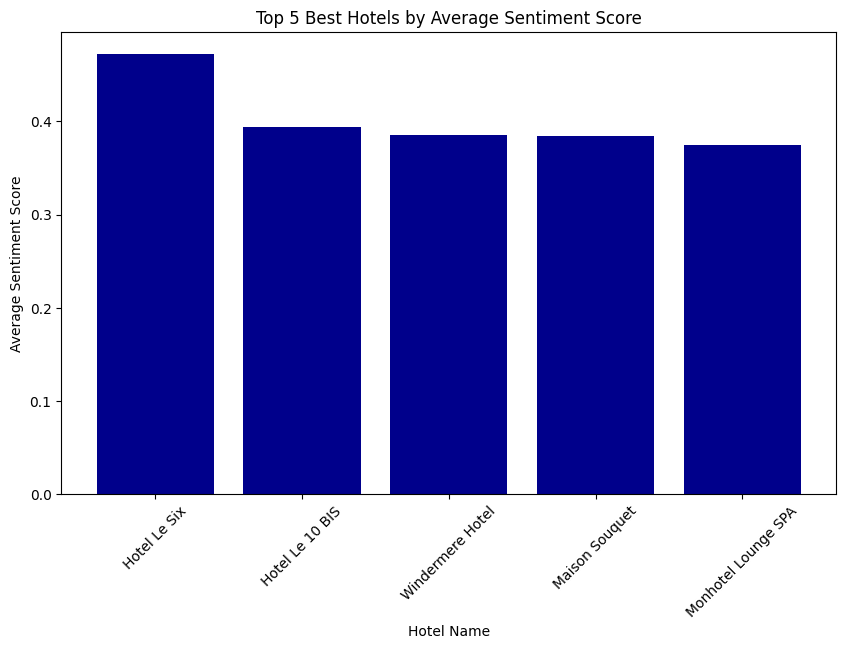

In [56]:
top_hotels = hotel_sentiment.tail(5)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_hotels.index, top_hotels.values, color='darkblue')
plt.ylabel('Average Sentiment Score')  # Changing to ylabel because it's now the vertical axis
plt.xlabel('Hotel Name')
plt.gca().invert_xaxis()
plt.title('Top 5 Best Hotels by Average Sentiment Score')
plt.xticks(rotation=45)  # Rotate hotel names to improve readability
plt.show()

In [35]:
print("❌ Bottom 5 Worst Hotels:\n", hotel_sentiment.head(5))

❌ Bottom 5 Worst Hotels:
 Hotel_Name
Hotel Astor Saint Honor                   -0.333333
Kube Hotel Ice Bar                        -0.310345
Mercure Paris Tour Eiffel Pont Mirabeau   -0.257732
Holiday Inn Paris Montparnasse Pasteur    -0.152542
Mercure Paris Porte d Orleans             -0.142857
Name: Sentiment_Score_DistilBERT, dtype: float64


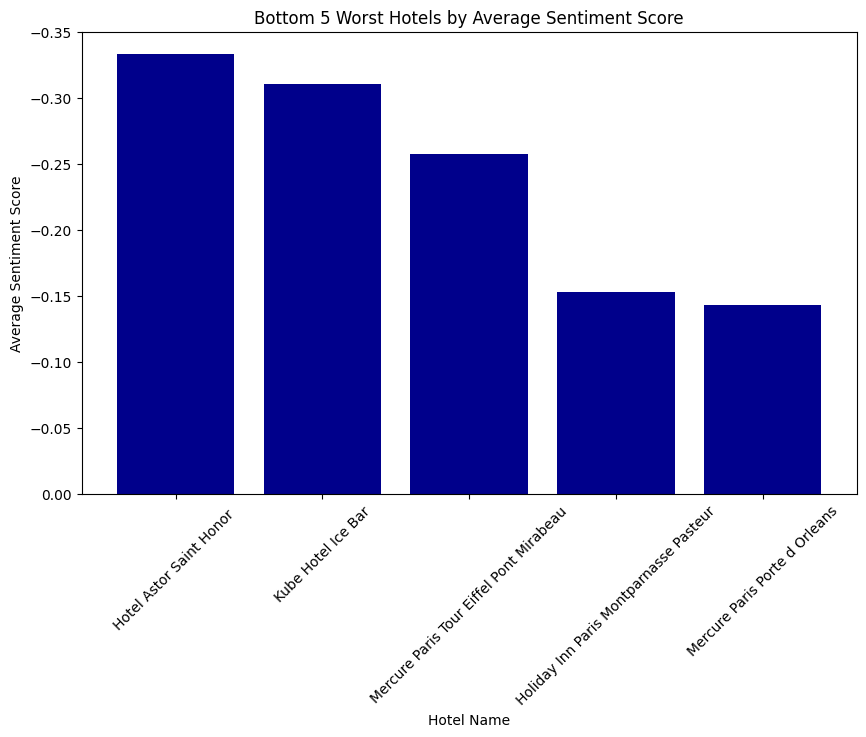

In [58]:
bottom_hotels = hotel_sentiment.head(5)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(bottom_hotels.index, bottom_hotels.values, color='darkblue')
plt.ylabel('Average Sentiment Score')  # Changing to ylabel because it's now the vertical axis
plt.xlabel('Hotel Name')
plt.gca().invert_yaxis()
plt.title('Bottom 5 Worst Hotels by Average Sentiment Score')
plt.xticks(rotation=45)  # Rotate hotel names to improve readability
plt.show()

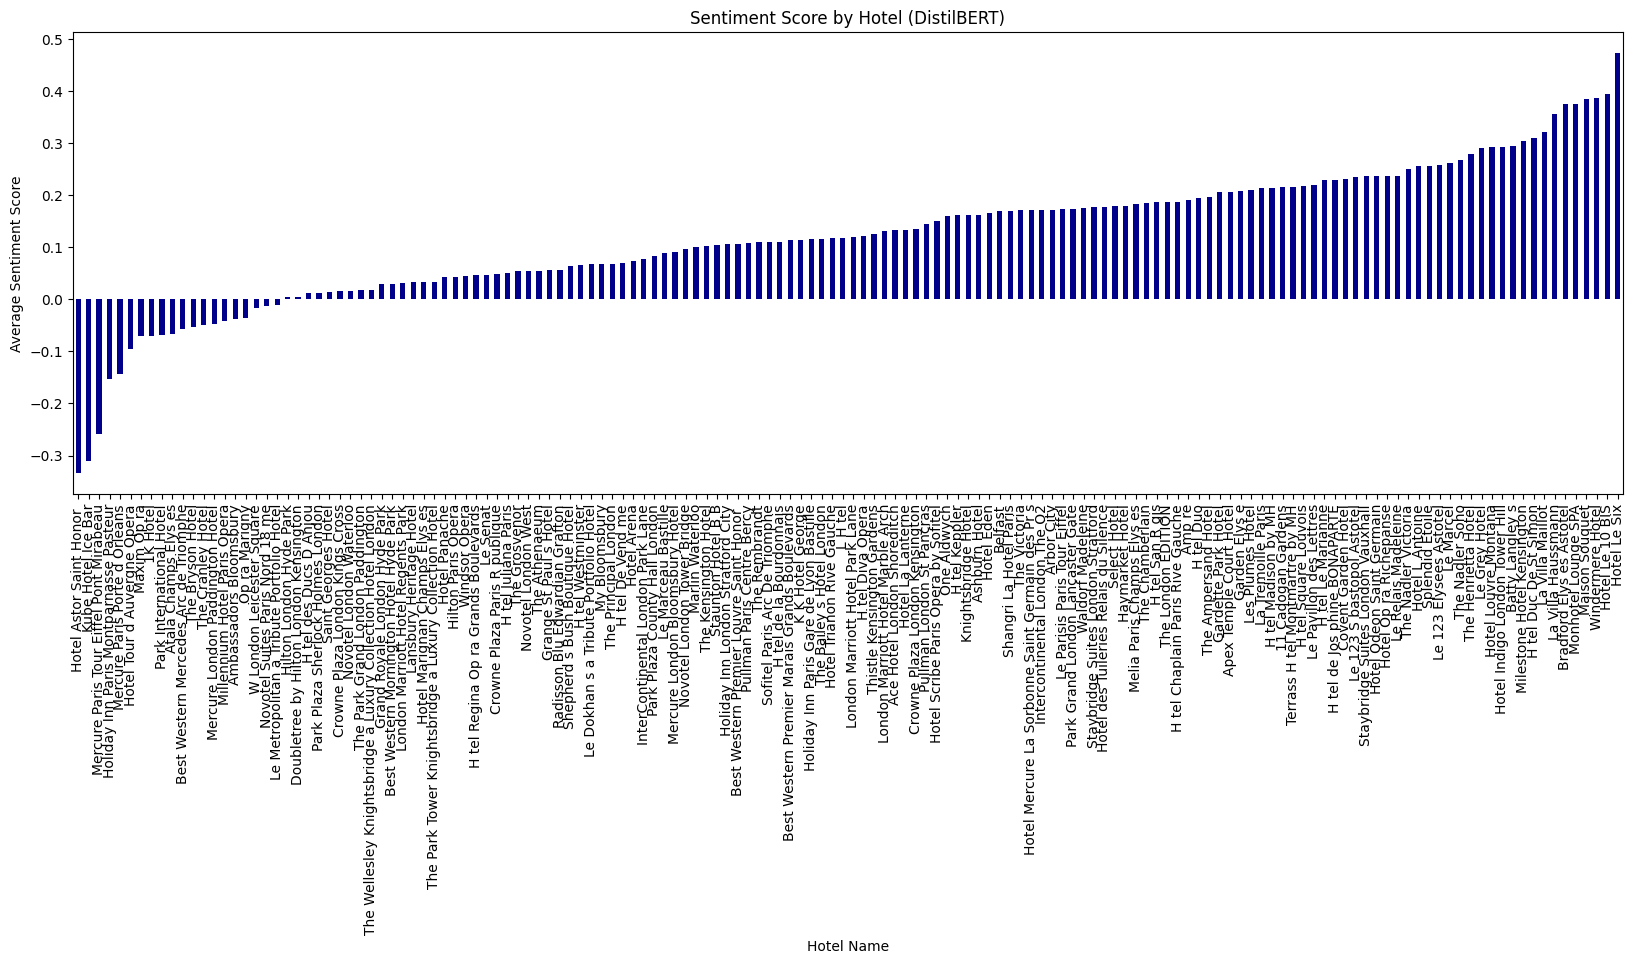

In [42]:
# Hotel Sentiments
plt.figure(figsize=(20, 6))
hotel_sentiment.plot(kind='bar', color='darkblue')
plt.xlabel('Hotel Name')
plt.ylabel('Average Sentiment Score')
plt.title('Sentiment Score by Hotel (DistilBERT)')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

In [37]:
# Count number of positive and negative reviews per hotel
hotel_sentiment_counts = balanced_df.groupby(['Hotel_Name', 'Sentiment_Score_DistilBERT']).size().unstack()

# Fill NaN values with 0 (some hotels might not have both positive & negative reviews)
#hotel_sentiment_counts.fillna(0, inplace=True)

# Show the first few rows
print(hotel_sentiment_counts)

Sentiment_Score_DistilBERT    -1    1
Hotel_Name                           
11 Cadogan Gardens            91  141
1K Hotel                     121  105
Ace Hotel London Shoreditch  331  432
Ambassadors Bloomsbury       623  577
Amp re                       100  147
...                          ...  ...
Thistle Kensington Gardens   569  731
W London Leicester Square    205  198
Waldorf Madeleine            174  248
Windermere Hotel              35   79
Windsor Opera                 21   23

[148 rows x 2 columns]


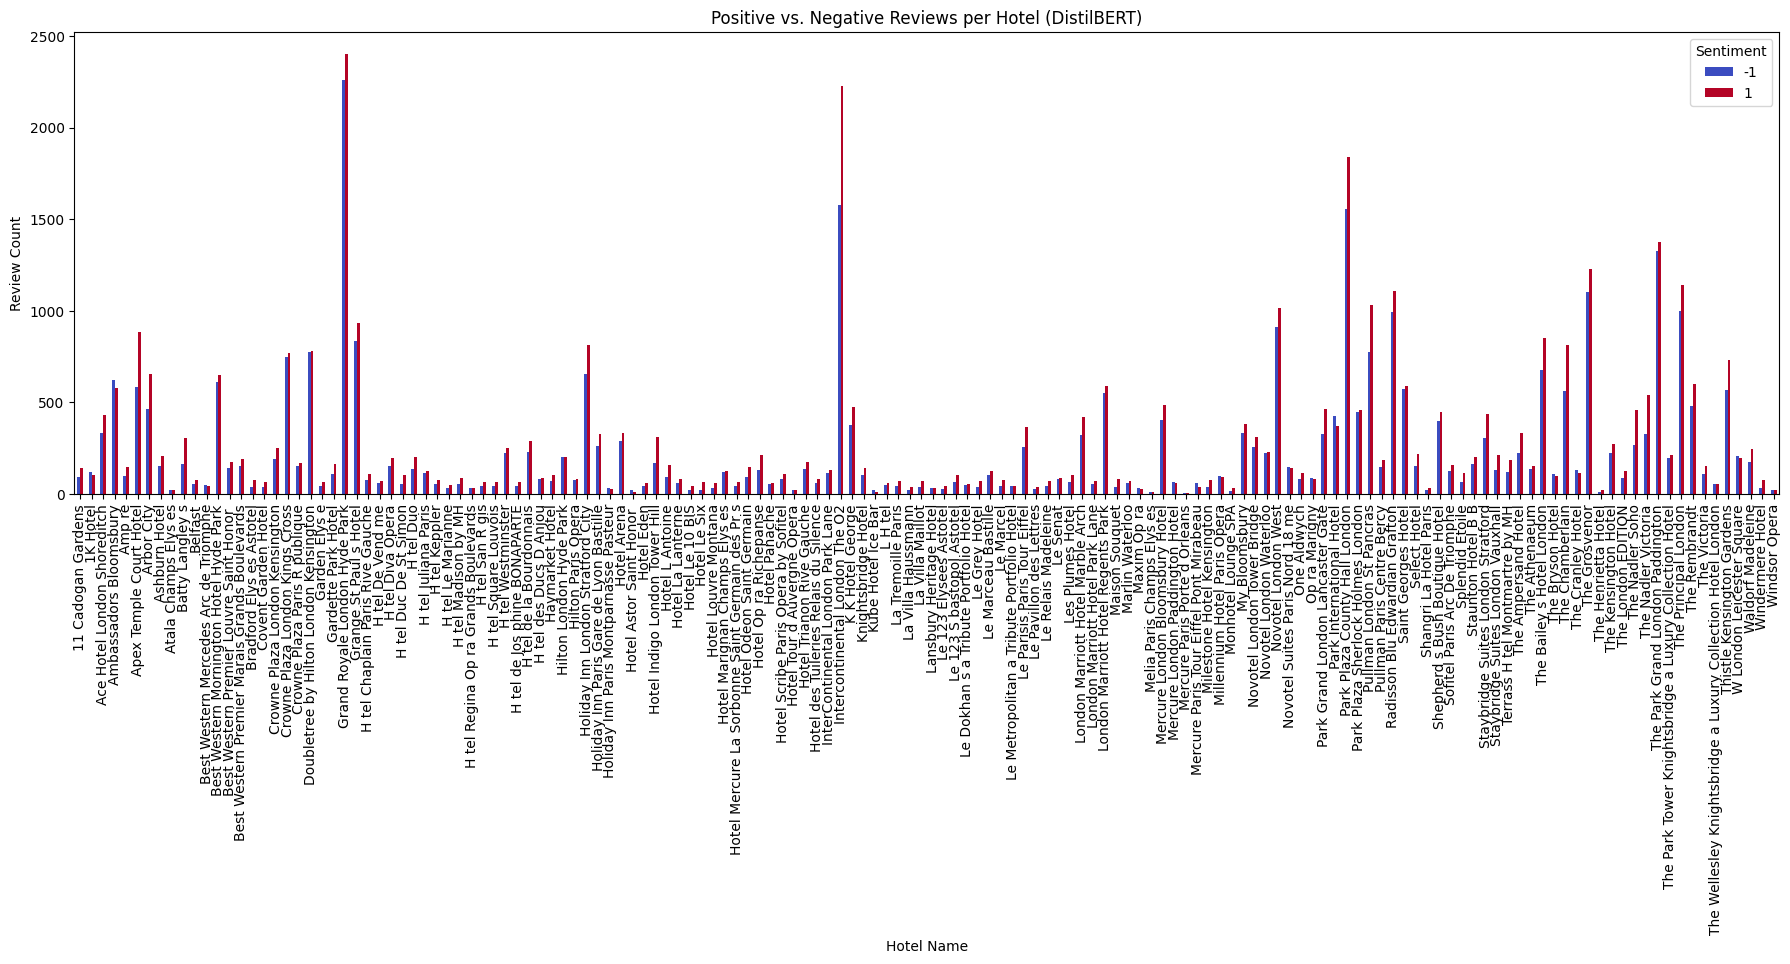

In [61]:
# Positive vs Negative Reviews per Hotel
hotel_sentiment_counts.plot(kind='bar', stacked= False, figsize=(22, 6), colormap='coolwarm')
plt.xlabel('Hotel Name')
plt.ylabel('Review Count')
plt.title('Positive vs. Negative Reviews per Hotel (DistilBERT)')
plt.xticks(rotation=90)
plt.legend(title="Sentiment")
plt.show()

## Wordcloud

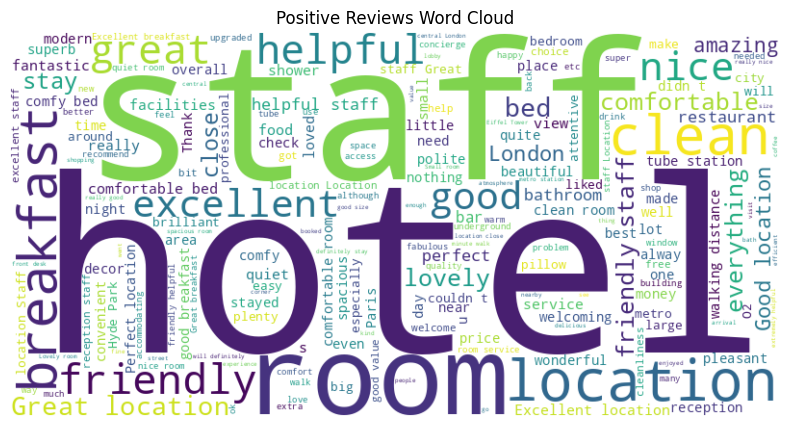

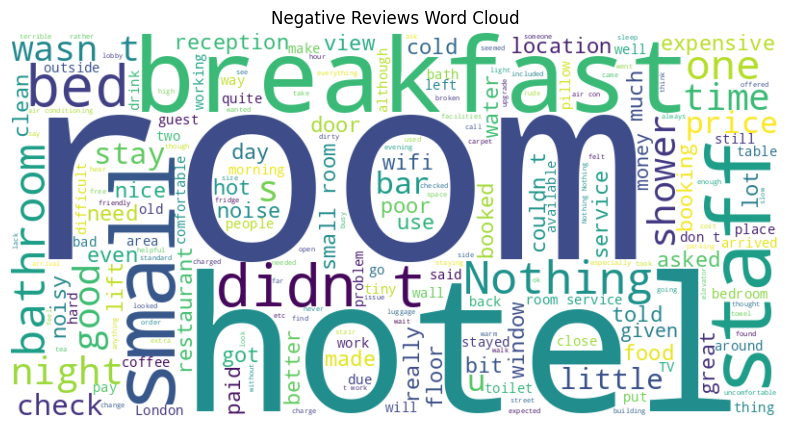

In [63]:
# Filtering reviews based on sentiment
positive_reviews = balanced_df[balanced_df['Predicted_Review_DistilBERT'] == 'POSITIVE']['Review'].str.cat(sep=' ')
negative_reviews = balanced_df[balanced_df['Predicted_Review_DistilBERT'] == 'NEGATIVE']['Review'].str.cat(sep=' ')

# Generate a word cloud for positive reviews
wordcloud_pos = WordCloud(width = 800, height = 400, background_color ='white').generate(positive_reviews)

# Generate a word cloud for negative reviews
wordcloud_neg = WordCloud(width = 800, height = 400, background_color ='white').generate(negative_reviews)

# Display the positive word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud')
plt.axis("off")
plt.show()

# Display the negative word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud')
plt.axis("off")
plt.show()